In [1]:
import nbimporter
import pandas as pd
import math
#import ace_tools as tools

In [2]:
from fct_usuelles import lire_graphe, afficher_graphe, visualiser_graphe_par_etape
from fct_usuelles import generate_cyclic_graph, generate_chain_graph, generate_spider_graph
from mtd_math import solver, solveur_gbp
from algo_recherche import recherche_profondeur, recherche_largeur, trouver_sequence_brulage, trouver_sequence_optimale

# 1

In [3]:
# 10 sommets (3.16)
#fichier = r'instances\Stranke94\Stranke94.mtx'

# 29 sommets (5.38)
fichier = r'instances\bn-mouse_visual-cortex_1\bn-mouse_visual-cortex_1.mtx'

# 34 sommets (5,83)
#fichier = r'instances\karate\karate.mtx'

# 7057 sommets (84.005)
#fichier = r'instances\fb-pages-government\fb-pages-government.mtx'

# 11631 sommets (107.84)
#fichier = r'instances\web-wiki-crocodile\web-wiki-crocodile.mtx'

# 196 591 sommets (443.38)
#fichier = r'instances\loc-gowalla_edges\loc-gowalla_edges.mtx'

graphe = lire_graphe(fichier)

In [4]:
# Graphe cyclique (4)
#graphe = generate_cyclic_graph(16)

# Graphe en chaîne (4)
#graphe = generate_chain_graph(16)

# Graphe en étoile/spider (4.58)
graphe = generate_spider_graph(0, leg_length=4, num_legs=5)

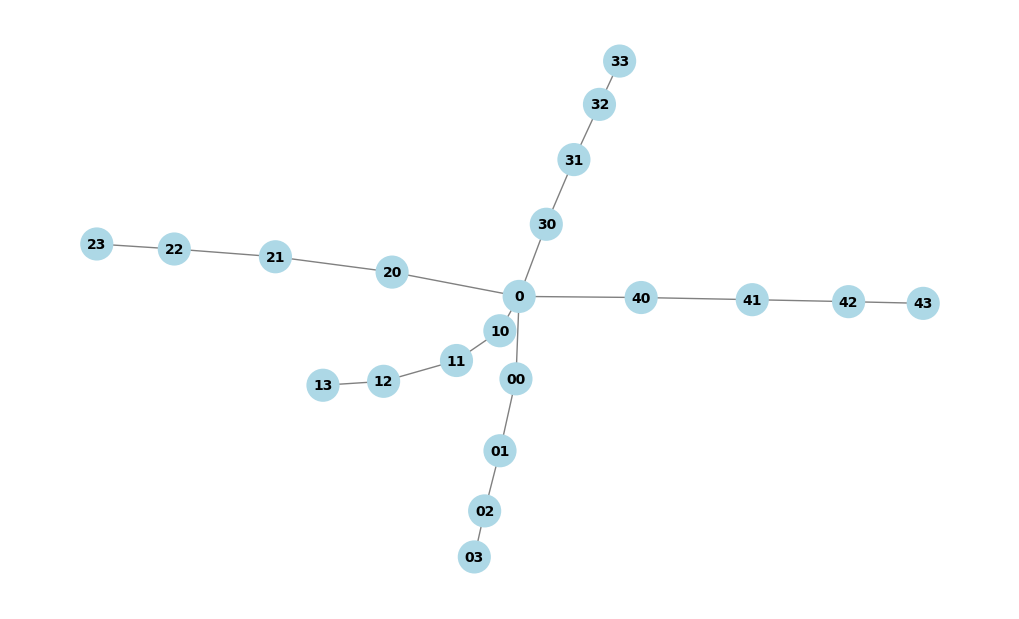

In [5]:
afficher_graphe(graphe)

---

## Methode mathematique

### Mthd 1

In [6]:
solver(graphe)

Set parameter Username
Set parameter LicenseID to value 2601900
Academic license - for non-commercial use only - expires 2025-12-18
Solution optimale trouvée :
Chemin trouvé : [0, '10', '33', '41', '00']


[0, '10', '33', '41', '00']

### Mthd 2

In [7]:
B_max = round(len(graphe)**0.5)
B, chemin = solveur_gbp(graphe, B_max)

Solution trouvée pour B = 5
Chemin trouvé : [0, '10', '33', '41', '00']


---

## Algo de recherche

In [8]:
etat_initial = {sommet: 0 for sommet in graphe}

### DFS

In [9]:
sommets_actifs_p, cout = recherche_profondeur(graphe, etat_initial)

print("*********** Parcours en profondeur ***********")
print("Sommets brûlés à chaque étape:", sommets_actifs_p)
print("Coût total:", cout)

*********** Parcours en profondeur ***********
Sommets brûlés à chaque étape: [0, '01', '12', '23']
Coût total: 5


### BFS

In [10]:
sommets_actifs_l, cout = recherche_largeur(graphe, etat_initial)

print("*********** Parcours en largeur ***********")
print("Sommets brûlés à chaque étape:", sommets_actifs_l)
print("Coût total:", cout)

*********** Parcours en largeur ***********
Sommets brûlés à chaque étape: [0, '01', '03', '13']
Coût total: 5


### Couverture des balles

#### Mthd 1

In [11]:
sequence = trouver_sequence_brulage(graphe)
if sequence:
    print("Solution optimale trouvée :", sequence)
    liste_triee = sorted(sequence, key=lambda x: x[1], reverse=True)
    centres = [centre for centre, rayon in liste_triee]
else:
    print("Aucune solution valide trouvée.")

Solution optimale trouvée : [(0, 5)]


#### Mthd 2

In [12]:
sequence = trouver_sequence_optimale(graphe)
if sequence:
    print("Solution optimale trouvée :", sequence)
    liste_triee = sorted(sequence, key=lambda x: x[1], reverse=True)
    centres = [centre for centre, rayon in liste_triee]
else:
    print("Aucune solution valide trouvée.")


NameError: name 'memo' is not defined

---

# 2

In [17]:
# Définition des graphes à tester
graphes = {
    "Stranke94": lire_graphe(r'instances/Stranke94/Stranke94.mtx'),
    "mouse_visual-cortex_1": lire_graphe(r'instances/bn-mouse_visual-cortex_1/bn-mouse_visual-cortex_1.mtx'),
    "karate": lire_graphe(r'instances/karate/karate.mtx'),
    "Graphe Cycle": generate_cyclic_graph(16),
    "Graphe Chaîne": generate_chain_graph(16),
    "Graphe Étoile": generate_spider_graph(0, leg_length=4, num_legs=5),
}

im new


In [18]:
# Initialisation du tableau des résultats
resultats = []

# Parcours de chaque graphe
for nom, graphe in graphes.items():
    nb_sommets = len(graphe)
    nb_aretes = sum(len(v) for v in graphe.values()) // 2  # Division par 2 car graphe non orienté
    B_max = math.ceil(nb_sommets ** 0.5)

    # Application des algorithmes
    etat_initial = {sommet: 0 for sommet in graphe}

    try:
        sommets_actifs_p, cout_p = recherche_profondeur(graphe, etat_initial)
    except Exception as e:
        sommets_actifs_p, cout_p = str(e), None

    try:
        sommets_actifs_l, cout_l = recherche_largeur(graphe, etat_initial)
    except Exception as e:
        sommets_actifs_l, cout_l = str(e), None

    try:
        sequence_brulage = trouver_sequence_brulage(graphe)
    except Exception as e:
        sequence_brulage = str(e)

    try:
        sequence_opt = trouver_sequence_optimale(graphe)
    except Exception as e:
        sequence_opt = str(e)

    try:
        solver_result = solver(graphe)
    except Exception as e:
        solver_result = str(e)

    try:
        B, chemin = solveur_gbp(graphe, B_max)
    except Exception as e:
        B, chemin = None, str(e)
    
    # Ajout des résultats au tableau
    resultats.append({
        "Graphe": nom,
        "|V|": nb_sommets,
        "|E|": nb_aretes,
        "B_max": B_max,
        "Recherche Profondeur": sommets_actifs_p,
        "Recherche Largeur": sommets_actifs_l,
        "Solveur Mathématique": solver_result,
        "Solveur GBP": chemin,
        "Séquence Brûlage": sequence_brulage,
        "Séquence Optimale": sequence_opt
    })


# Convertir en DataFrame et afficher
df = pd.DataFrame(resultats)

df

Solution optimale trouvée :
Chemin trouvé : [4, 5, 1]
Solution trouvée pour B = 3
Chemin trouvé : [4, 5, 1]
Solution optimale trouvée :
Chemin trouvé : [3, 22, 12, 24, 27]
Solution trouvée pour B = 4
Chemin trouvé : [12, 22, 15, 24]
Solution optimale trouvée :
Chemin trouvé : [21, 32, 3, 29, 18, 16]
Solution trouvée pour B = 3
Chemin trouvé : [1, 34, 3]
Solution optimale trouvée :
Chemin trouvé : [0, '10', '33', '41', '00']
Solution trouvée pour B = 5
Chemin trouvé : [0, '10', '33', '41', '00']


,Graphe,|V|,|E|,B_max,Recherche Profondeur,Recherche Largeur,Solveur Mathématique,Solveur GBP,Séquence Brûlage,Séquence Optimale
0,Stranke94,10,21,4,"[3, 6]","[3, 6]","[4, 5, 1]","[4, 5, 1]","[(3, 3)]","[(3, 3)]"
1,mouse_visual-cortex_1,29,44,6,"[9, 2, 1, 6]","[1, 22, 2]","[3, 22, 12, 24, 27]","[12, 22, 15, 24]","[(1, 6)]","[(6, 1), (9, 4)]"
2,karate,34,78,6,"[34, 1, 17]","[1, 34]","[21, 32, 3, 29, 18, 16]","[1, 34, 3]","[(2, 4)]","[(17, 1), (32, 3)]"
3,Graphe Cycle,16,16,4,"[0, 2, 4, 6, 8, 10]","[0, 2, 6, 10]",None,None,"[(0, 1), (2, 2), (6, 3), (12, 4)]","[(3, 1), (5, 2), (9, 3), (15, 4)]"
4,Graphe Chaîne,16,15,4,"[1, 3, 5, 7, 9, 11, 13, 15]","[0, 4, 10, 14]",None,None,"[(0, 1), (2, 2), (6, 3), (12, 4)]","[(15, 1), (6, 2), (2, 3), (11, 4)]"
5,Graphe Étoile,21,20,5,"[0, 01, 12, 23]","[0, 01, 03, 13]","[0, 10, 33, 41, 00]","[0, 10, 33, 41, 00]","[(0, 5)]",'<' not supported between instances of 'str' a...
